In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

In [2]:
# Store filepath in a variable
data = "Resources/data.csv"
data_by_artist = "Resources/data_by_artist.csv"
data_by_genres = "Resources/data_by_genres.csv"
data_by_year = "Resources/data_by_year.csv"
data_w_genres = "Resources/data_w_genres.csv"

In [3]:
data_df = pd.read_csv(data, encoding="ISO-8859-1")
data_by_artist_df = pd.read_csv(data_by_artist, encoding="ISO-8859-1")
data_by_genres_df = pd.read_csv(data_by_genres, encoding="ISO-8859-1")
data_by_year_df = pd.read_csv(data_by_year, encoding="ISO-8859-1")
data_w_genres_df = pd.read_csv(data_w_genres, encoding="ISO-8859-1")

In [4]:
list(data_df.columns.values)

['acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo',
 'valence',
 'year']

In [5]:
data_df.round(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.99,['Mamie Smith'],0.60,168333,0.22,0,0cS0A1fUEUd1EW3FcF8AEI,0.00,5,0.38,-12.63,0,Keep A Song In Your Soul,12,1920,0.09,149.98,0.63,1920
1,0.64,"[""Screamin' Jay Hawkins""]",0.85,150200,0.52,0,0hbkKFIJm7Z05H8Zl9w30f,0.03,5,0.08,-7.26,0,I Put A Spell On You,7,1920-01-05,0.05,86.89,0.95,1920
2,0.99,['Mamie Smith'],0.65,163827,0.19,0,11m7laMUgmOKqI3oYzuhne,0.00,0,0.52,-12.10,1,Golfing Papa,4,1920,0.17,97.60,0.69,1920
3,0.00,['Oscar Velazquez'],0.73,422087,0.80,0,19Lc5SfJJ5O1oaxY0fpwfh,0.80,2,0.13,-7.31,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.04,128.00,0.04,1920
4,0.30,['Mixe'],0.70,165224,0.71,1,2hJjbsLCytGsnAHfdsLejp,0.00,10,0.40,-6.04,0,Xuniverxe,2,1920-10-01,0.08,122.08,0.30,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.01,"['DJ Combo', 'Sander-7', 'Tony T']",0.79,147615,0.87,0,46LhBf6TvYjZU2SMvGZAbn,0.00,6,0.18,-5.09,0,The One,0,2020-12-25,0.04,125.97,0.19,2020
174385,0.80,['Alessia Cara'],0.43,144720,0.21,0,7tue2Wemjd0FZzRtDrQFZd,0.00,4,0.20,-11.66,1,A Little More,0,2021-01-22,0.04,94.71,0.23,2021
174386,0.81,['Roger Fly'],0.67,218147,0.59,0,48Qj61hOdYmUCFJbpQ29Ob,0.92,4,0.11,-12.39,0,Together,0,2020-12-09,0.03,108.06,0.71,2020
174387,0.92,['Taylor Swift'],0.46,244000,0.24,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00,0,0.11,-12.08,1,champagne problems,69,2021-01-07,0.04,171.32,0.32,2021


In [6]:
# view data by artist
data_by_artist_df.round(2)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.60,0.47,267072.00,0.38,0.01,0.28,-14.43,0.21,114.13,0.36,38.20,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.86,0.44,287280.00,0.41,0.08,0.32,-10.69,0.18,103.04,0.27,31.54,5,1,26
2,"""Fiddler On The Roofâ Motion Picture Chorus",0.86,0.35,328920.00,0.29,0.02,0.33,-15.23,0.12,77.38,0.35,34.57,0,1,7
3,"""Fiddler On The Roofâ Motion Picture Orchestra",0.88,0.43,262890.96,0.25,0.07,0.28,-15.64,0.12,88.67,0.37,34.41,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.51,0.47,270436.14,0.49,0.01,0.20,-10.24,0.10,122.84,0.48,42.00,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,ê¹í¨ê·¼,0.94,0.17,341821.00,0.32,0.76,0.70,-13.41,0.04,138.30,0.06,0.00,3,1,1
32535,ëì¨,0.72,0.59,241281.50,0.47,0.00,0.10,-6.59,0.05,107.60,0.51,16.00,1,1,4
32536,ë¯¸ì¤í°,0.42,0.69,216715.00,0.82,0.00,0.11,-6.30,0.08,122.05,0.62,0.00,5,0,2
32537,ìì¨ Zion & íí´ Hanhae of í¬í  Phantom,0.29,0.74,242480.00,0.48,0.00,0.08,-8.92,0.38,81.49,0.80,8.00,2,0,2


In [7]:
# view data by genre
data_by_genres_df

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,zim urban groove,0.003910,0.553000,4.267200e+04,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1
3228,zolo,0.208648,0.533837,2.641016e+05,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1
3229,zouk,0.272928,0.641889,4.416418e+05,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1
3230,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,0


In [8]:
# view data by years
data_by_year_df.round(2)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.63,0.52,238093.00,0.42,0.35,0.22,-12.65,0.08,113.23,0.50,0.61,2,1
1,1921,0.86,0.43,257891.76,0.24,0.34,0.21,-16.81,0.08,102.43,0.38,0.39,2,1
2,1922,0.83,0.58,140135.14,0.23,0.25,0.26,-20.84,0.46,100.03,0.57,0.09,5,1
3,1923,0.96,0.58,177942.36,0.26,0.37,0.23,-14.13,0.09,114.01,0.63,5.21,0,1
4,1924,0.94,0.55,191046.71,0.34,0.58,0.24,-14.23,0.09,120.69,0.66,0.66,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2017,0.21,0.58,243402.25,0.69,0.25,0.23,-8.03,0.10,121.83,0.44,31.66,1,1
98,2018,0.23,0.60,227073.14,0.66,0.23,0.23,-8.17,0.12,123.64,0.43,27.60,7,1
99,2019,0.26,0.60,225463.33,0.63,0.22,0.22,-8.53,0.11,122.42,0.46,32.35,7,1
100,2020,0.20,0.61,218977.48,0.67,0.25,0.23,-8.08,0.10,124.06,0.47,24.06,0,1


In [9]:
#view data with genres
data_w_genres_df.round(2)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.60,0.47,267072.00,0.38,0.01,0.28,-14.43,0.21,114.13,0.36,38.20,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.86,0.44,287280.00,0.41,0.08,0.32,-10.69,0.18,103.04,0.27,31.54,5,1,26,[]
2,"""Fiddler On The Roofâ Motion Picture Chorus",0.86,0.35,328920.00,0.29,0.02,0.33,-15.23,0.12,77.38,0.35,34.57,0,1,7,[]
3,"""Fiddler On The Roofâ Motion Picture Orchestra",0.88,0.43,262890.96,0.25,0.07,0.28,-15.64,0.12,88.67,0.37,34.41,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.51,0.47,270436.14,0.49,0.01,0.20,-10.24,0.10,122.84,0.48,42.00,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32534,ê¹í¨ê·¼,0.94,0.17,341821.00,0.32,0.76,0.70,-13.41,0.04,138.30,0.06,0.00,3,1,1,[]
32535,ëì¨,0.72,0.59,241281.50,0.47,0.00,0.10,-6.59,0.05,107.60,0.51,16.00,1,1,4,[]
32536,ë¯¸ì¤í°,0.42,0.69,216715.00,0.82,0.00,0.11,-6.30,0.08,122.05,0.62,0.00,5,0,2,[]
32537,ìì¨ Zion & íí´ Hanhae of í¬í  Phantom,0.29,0.74,242480.00,0.48,0.00,0.08,-8.92,0.38,81.49,0.80,8.00,2,0,2,[]


In [10]:
#Convert duration in ms to minutes
duration_ms = data_df["duration_ms"]
duration_in_minutes = duration_ms/(1000*60)

#Add column showing duration in minutes
data_df["Duration in Minutes"] = data_df["duration_ms"]/(1000*60)
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Duration in Minutes
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,2.805550
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,2.503333
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,2.730450
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,7.034783
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,2.753733


In [11]:
# Displaying Data from main data from for year, danceability, popularity, duration(minutes), and explicitness
dance_data = data_df.loc[:, ["artists","year", "danceability", "popularity", "Duration in Minutes", "explicit", "tempo", "liveness","acousticness","speechiness","instrumentalness" ]]
dance_data.head()

,artists,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness,acousticness,speechiness,instrumentalness
0,['Mamie Smith'],1920,0.598,12,2.805550,0,149.976,0.3790,0.991000,0.0936,0.000522
1,"[""Screamin' Jay Hawkins""]",1920,0.852,7,2.503333,0,86.889,0.0809,0.643000,0.0534,0.026400
2,['Mamie Smith'],1920,0.647,4,2.730450,0,97.600,0.5190,0.993000,0.1740,0.000018
3,['Oscar Velazquez'],1920,0.730,17,7.034783,0,127.997,0.1280,0.000173,0.0425,0.801000
4,['Mixe'],1920,0.704,2,2.753733,1,122.076,0.4020,0.295000,0.0768,0.000246


In [12]:
# Large population, we limited our analysis to 1990 - 2020 
music_years = dance_data.query("year>1989").query("year<2021")

music_years.describe

<bound method NDFrame.describe of                                    artists  year  danceability  popularity  \
9071            ['Gerry & The Pacemakers']  2008         0.484          55   
9081            ['Gerry & The Pacemakers']  2008         0.405          39   
9085            ['Gerry & The Pacemakers']  2008         0.477          34   
9087                     ['Frank Sinatra']  2018         0.319          27   
9091                     ['Frank Sinatra']  2018         0.269          26   
...                                    ...   ...           ...         ...   
174380              ['Stephan F', 'YA-YA']  2020         0.693           0   
174382        ['BigBankCarti', 'Keyvo400']  2020         0.544           0   
174384  ['DJ Combo', 'Sander-7', 'Tony T']  2020         0.792           0   
174386                       ['Roger Fly']  2020         0.671           0   
174388                       ['Roger Fly']  2020         0.677           0   

        Duration in Minutes  

In [13]:
music_years.round(2)

,artists,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness,acousticness,speechiness,instrumentalness
9071,['Gerry & The Pacemakers'],2008,0.48,55,2.67,0,113.56,0.15,0.39,0.03,0.00
9081,['Gerry & The Pacemakers'],2008,0.40,39,2.37,0,104.54,0.16,0.26,0.03,0.00
9085,['Gerry & The Pacemakers'],2008,0.48,34,2.62,0,106.77,0.12,0.41,0.03,0.00
9087,['Frank Sinatra'],2018,0.32,27,3.12,0,117.15,0.90,0.89,0.06,0.00
9091,['Frank Sinatra'],2018,0.27,26,3.95,0,82.33,0.68,0.94,0.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...
174380,"['Stephan F', 'YA-YA']",2020,0.69,0,2.95,0,126.05,0.23,0.05,0.08,0.00
174382,"['BigBankCarti', 'Keyvo400']",2020,0.54,0,3.58,1,129.75,0.25,0.14,0.23,0.00
174384,"['DJ Combo', 'Sander-7', 'Tony T']",2020,0.79,0,2.46,0,125.97,0.18,0.01,0.04,0.00
174386,['Roger Fly'],2020,0.67,0,3.64,0,108.06,0.11,0.81,0.03,0.92


In [14]:
#Find year with highest danceability
most_danceable = music_years.sort_values(["danceability"], ascending=False).reset_index()
most_danceable.head()

,index,artists,year,danceability,popularity,Duration in Minutes,explicit,tempo,liveness,acousticness,speechiness,instrumentalness
0,141441,"['Pitbull', 'Trina', 'Young Bo']",2012,0.986,52,3.827817,1,115.004,0.1970,0.14500,0.308,0.000002
1,92739,['Nilla Pizzi'],2014,0.985,0,3.527000,0,125.006,0.1320,0.12400,0.286,0.902000
2,37455,['Tone-Loc'],2010,0.985,7,4.157733,0,117.003,0.0408,0.00297,0.152,0.000188
3,171536,"['Dan McKie', 'Zigmund Slezak']",2013,0.985,0,7.000000,0,128.016,0.0687,0.02250,0.230,0.307000
4,173266,['Michael Beyer'],2016,0.982,0,6.000000,0,128.015,0.1250,0.00276,0.454,0.210000


In [15]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [16]:
data_df["artists"] = data_df["artists"].str.strip("[")
data_df["artists"] = data_df["artists"].str.strip("]")
data_df["artists"]

artists = tidy_split(data_df,"artists",sep=', ',keep=True)
artists["artists"] = artists["artists"].str.strip("'")
artists["artists"] = artists["artists"].str.strip('"')
artists

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,Duration in Minutes
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,2.805550
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,2.503333
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,2.730450
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,7.034783
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,2.753733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,Tony T,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020,2.460250
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,2.412000
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020,3.635783
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021,4.066667


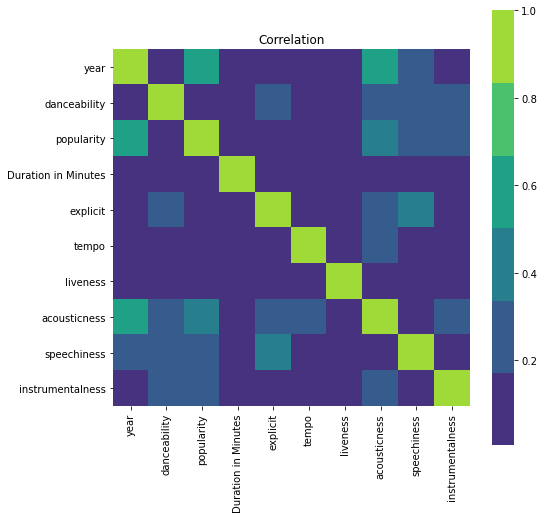

In [17]:
#Correlation between year, danceability, popularity, duration, etc.
corr = np.abs(dance_data.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("viridis")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation')
plt.show()

Text(0.5, 0, 'Year')

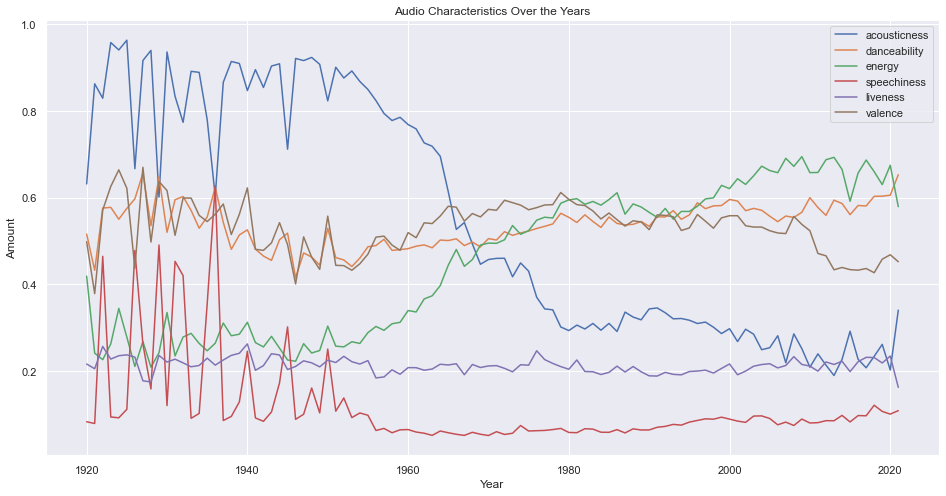

In [18]:
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio Characteristics Over the Years')
ax.set_ylabel('Amount')
ax.set_xlabel('Year')

Text(0.5, 0, 'Year')

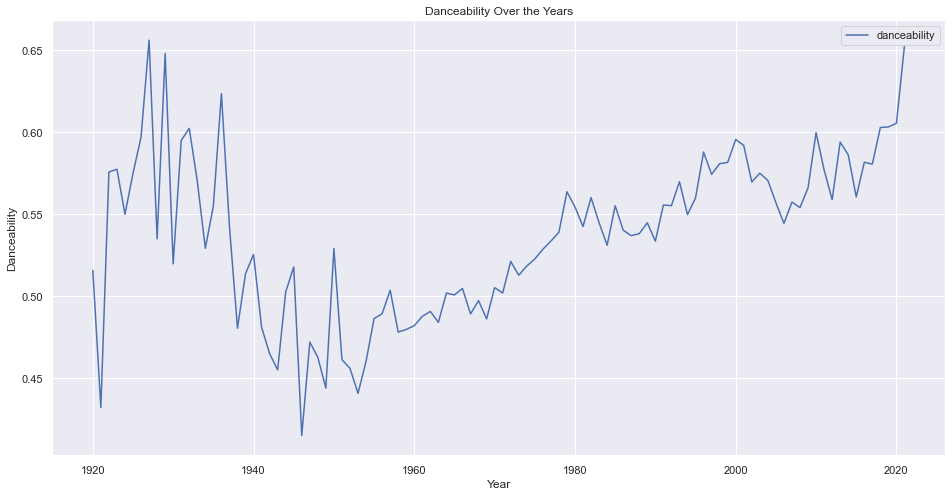

In [19]:
#Danceability visualization
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
columns = ["danceability"]
for col in columns:
    x = data_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Danceability Over the Years')
ax.set_ylabel('Danceability')
ax.set_xlabel('Year')

<Figure size 1152x576 with 0 Axes>

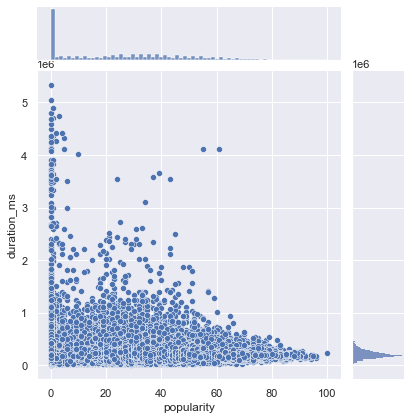

In [20]:
#Duration and popularity
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
ax = sns.jointplot(x=data_df.popularity,y=data_df["duration_ms"],data=data_df)


/Users/AndrewTheiss/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'positions'),
  Text(2, 0, 'Mood (feat. iann dior)'),
  Text(3, 0, 'WITHOUT YOU'),
  Text(4, 0, 'Whoopty'),
  Text(5, 0, 'LA NOCHE DE ANOCHE'),
  Text(6, 0, 'Therefore I Am'),
  Text(7, 0, '34+35'),
  Text(8, 0, 'What You Know Bout Love'),
  Text(9, 0, 'you broke me first')])

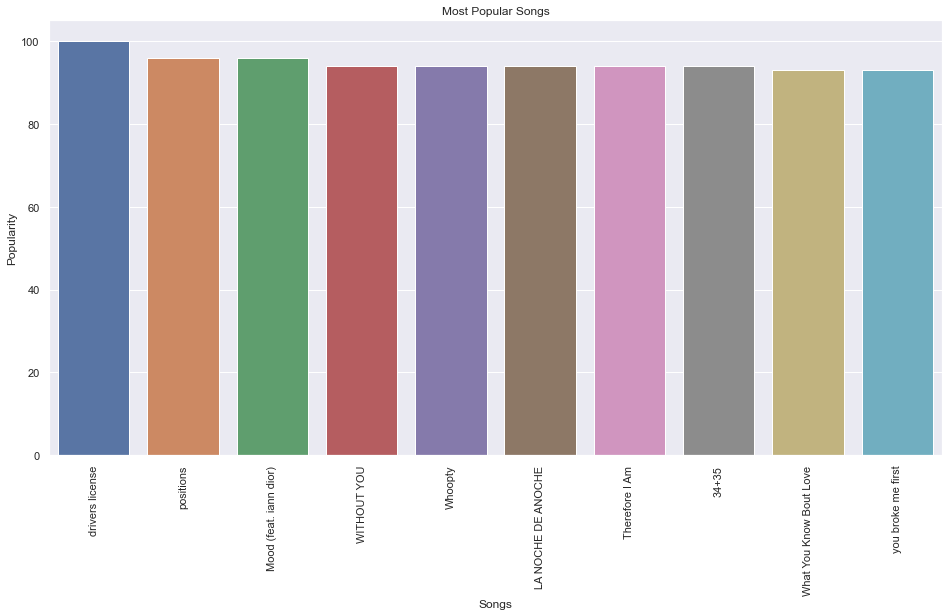

In [21]:
#Most popular songs
plt.figure(figsize=(16, 8))
sns.set(style="darkgrid")
x = data_df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x.index, x)
ax.set_title('Most Popular Songs')
ax.set_ylabel('Popularity')
ax.set_xlabel('Songs')
plt.xticks(rotation = 90)